# Projeto 1 de LPAA - Análise e Exploração de Dados - LEANDRO DANTAS LIMA (059.323.894-00)

In [309]:
# importando bibliotecas que serão utilizadas
!pip install folium
!pip install nltk
!pip install wordcloud
!pip install geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.offline as py
import plotly.graph_objs as go
import folium
import nltk # Natural Language Toolkit library
import re # Regular Expression library
import geopandas
from pandas import DataFrame
from folium import plugins
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ldl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ldl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ldl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\ldl\AppData\Local\Temp\ipykernel_8620\1841966371.py:25: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [204]:
# desativar mensagens de warnings
pd.options.mode.chained_assignment = None

In [205]:
# importando o banco de dados UFO Sightings para análise
df = pd.read_csv("scrubbed.csv", sep=",", on_bad_lines='skip', low_memory=False)

In [206]:
# criando uma cópia do dataframe para manter o backup do original
df_copy = df.copy(deep=True)  # deep=True (padrão) o novo objeto será criado com uma cópia dos dados e índices do objeto original, sem alterações no original.

In [207]:
# mostrando as 3 primeiras linhas para entender os dados
df_copy.head(3)

datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008        53.2   

   longitude   
0  -97.941111  
1  -98.581082  
2   -2.916667

In [208]:
# mostrando as propriedades do df
df_copy.shape

(80332, 11)

In [209]:
# mostrando as colunas do df
df_copy.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [210]:
# mostrando os tipos de dados --> quando não consegue definir, classifica como object
df_copy.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [211]:
# mostrando os índices
df_copy.index

RangeIndex(start=0, stop=80332, step=1)

In [212]:
# resumo estatístico do df --> apenas colunas com dados numéricos
df_copy.describe()

longitude 
count  80332.000000
mean     -86.772885
std       39.697205
min     -176.658056
25%     -112.073333
50%      -87.903611
75%      -78.755000
max      178.441900

In [213]:
# conferindo e contando se há valores ausentes no df
df_copy.isna().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [214]:
# limpando dados ausentes
df_copy_clean0 = df_copy.dropna()

In [215]:
# conferindo se ainda há valores ausentes
df_copy_clean0.isna().sum()

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
dtype: int64

In [216]:
# avaliando os tipos de dados por coluna
df_copy_clean0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66516 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              66516 non-null  object 
 1   city                  66516 non-null  object 
 2   state                 66516 non-null  object 
 3   country               66516 non-null  object 
 4   shape                 66516 non-null  object 
 5   duration (seconds)    66516 non-null  object 
 6   duration (hours/min)  66516 non-null  object 
 7   comments              66516 non-null  object 
 8   date posted           66516 non-null  object 
 9   latitude              66516 non-null  object 
 10  longitude             66516 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.1+ MB


In [217]:
# corrigindo dados não numéricos para estatísticas
col_num = ['duration (seconds)', 'latitude', 'longitude ']

def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)
        
to_type(df_copy_clean0, col_num, 'float')

In [218]:
# reconferindo tipo de dados na coluna latitude
df_copy_clean0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66516 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              66516 non-null  object 
 1   city                  66516 non-null  object 
 2   state                 66516 non-null  object 
 3   country               66516 non-null  object 
 4   shape                 66516 non-null  object 
 5   duration (seconds)    66516 non-null  float64
 6   duration (hours/min)  66516 non-null  object 
 7   comments              66516 non-null  object 
 8   date posted           66516 non-null  object 
 9   latitude              66516 non-null  float64
 10  longitude             66516 non-null  float64
dtypes: float64(3), object(8)
memory usage: 6.1+ MB


In [219]:
# filtrando dados para localização com data, local e duração
coord = ['datetime',  'latitude', 'longitude ', 'duration (seconds)', 'city', 'state', 'country', 'shape']
local = df_copy_clean0[coord]

In [220]:
# exportando/salvando coordenadas para uma planilha excel
local.to_excel(r'coordenadas.xlsx')

In [221]:
# contando elementos da coluna country
df_copy_clean0.country.value_counts()

country
us    63553
ca     2942
gb       11
au       10
Name: count, dtype: int64

In [222]:
# contando elementos da coluna state
df_copy_clean0.state.value_counts()

state
ca    8683
fl    3754
wa    3709
tx    3398
ny    2915
      ... 
nf      15
pe      10
dc       8
yt       7
yk       2
Name: count, Length: 67, dtype: int64

In [223]:
# contando elementos da coluna city
df_copy_clean0.city.value_counts()

city
seattle                           471
phoenix                           438
las vegas                         356
portland                          354
los angeles                       347
                                 ... 
egg harbor city                     1
garrettsville                       1
king of prussia (5 miles from)      1
moosup                              1
calmar (canada)                     1
Name: count, Length: 11920, dtype: int64

In [224]:
# contando elementos da coluna shape
df_copy_clean0['shape'].value_counts()

shape
light        14130
triangle      6817
circle        6405
fireball      5364
unknown       4774
other         4705
sphere        4552
disk          4319
oval          3160
formation     2088
cigar         1717
changing      1653
flash         1124
rectangle     1117
cylinder      1079
diamond        969
chevron        852
teardrop       614
egg            609
cone           257
cross          197
delta            7
round            2
pyramid          1
flare            1
hexagon          1
crescent         1
changed          1
Name: count, dtype: int64

In [225]:
# separando elementos da data de aparição
date_time = df_copy_clean0['datetime'].str.split('/')
print(date_time.head(1000))

0       [10, 10, 1949 20:30]
3       [10, 10, 1956 21:00]
4       [10, 10, 1960 20:00]
5       [10, 10, 1961 19:00]
7       [10, 10, 1965 23:45]
                ...         
1187    [10, 12, 2013 04:30]
1188    [10, 12, 2013 07:17]
1189    [10, 12, 2013 07:45]
1190    [10, 12, 2013 13:00]
1191    [10, 12, 2013 14:35]
Name: datetime, Length: 1000, dtype: object


In [226]:
# separando dia de datetime
day = df_copy_clean0['datetime'].str.split('/').str[1]
day

0        10
3        10
4        10
5        10
7        10
         ..
80327     9
80328     9
80329     9
80330     9
80331     9
Name: datetime, Length: 66516, dtype: object

In [227]:
# contando aparições por dia do mês
day.value_counts()

datetime
15    4846
1     4534
4     2665
20    2513
10    2386
30    2094
12    2092
13    2075
5     2058
14    2056
25    2016
16    1996
3     1973
19    1954
24    1938
7     1934
6     1930
8     1927
17    1926
28    1925
23    1919
18    1918
22    1909
11    1873
21    1871
2     1823
9     1814
27    1714
26    1693
29    1660
31    1484
Name: count, dtype: int64

In [228]:
# separando mês de datetime
mes = df_copy_clean0['datetime'].str.split('/').str[0]
mes

0        10
3        10
4        10
5        10
7        10
         ..
80327     9
80328     9
80329     9
80330     9
80331     9
Name: datetime, Length: 66516, dtype: object

In [229]:
# contando aparições por mês do ano
mes.value_counts()

datetime
7     7972
8     7152
6     6607
9     6360
10    6321
11    5702
12    4652
1     4596
4     4509
3     4482
5     4346
2     3817
Name: count, dtype: int64

In [230]:
# separando apenas ano em uma coluna
year_sight = df_copy_clean0['datetime'].str.split('/').str[2].str.split(' ').str[0]

In [231]:
year_sight

0        1949
3        1956
4        1960
5        1961
7        1965
         ... 
80327    2013
80328    2013
80329    2013
80330    2013
80331    2013
Name: datetime, Length: 66516, dtype: object

In [232]:
# contando aparições por ano
year_sight.value_counts()

datetime
2012    6489
2013    6237
2011    4456
2008    4089
2009    3743
        ... 
1943       1
1941       1
1920       1
1925       1
1934       1
Name: count, Length: 83, dtype: int64

In [233]:
# criando a coluna ano de avistamento no dataframe
df_copy_clean0['year_sight'] = year_sight

In [234]:
# conferindo coluna ano criada
df_copy_clean0.head(3)

datetime        city state country     shape  duration (seconds)  \
0  10/10/1949 20:30  san marcos    tx      us  cylinder              2700.0   
3  10/10/1956 21:00        edna    tx      us    circle                20.0   
4  10/10/1960 20:00     kaneohe    hi      us     light               900.0   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   

  date posted   latitude  longitude  year_sight  
0   4/27/2004  29.883056  -97.941111       1949  
3   1/17/2004  28.978333  -96.645833       1956  
4   1/22/2004  21.418056 -157.803611       1960

In [235]:
# mostrando colunas atuais do df
df_copy_clean0.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'year_sight'],
      dtype='object')

In [236]:
# reordenando colunas do dataframe para melhor análise
df_copy_clean1 = df_copy_clean0[['datetime', 'year_sight', 'duration (seconds)', 'country', 'state', 'city',  'latitude', 'longitude ', 'shape']]

In [237]:
# mostrando colunas reordenadas
df_copy_clean1.head(3)

datetime year_sight  duration (seconds) country state        city  \
0  10/10/1949 20:30       1949              2700.0      us    tx  san marcos   
3  10/10/1956 21:00       1956                20.0      us    tx        edna   
4  10/10/1960 20:00       1960               900.0      us    hi     kaneohe   

    latitude  longitude      shape  
0  29.883056  -97.941111  cylinder  
3  28.978333  -96.645833    circle  
4  21.418056 -157.803611     light

In [238]:
# contando duração das aparições
df_copy_clean1['duration (seconds)'].value_counts()

duration (seconds)
300.0        7254
120.0        5973
600.0        5223
60.0         4830
180.0        4261
             ... 
7894800.0       1
60600.0         1
555.0           1
212.0           1
181.0           1
Name: count, Length: 466, dtype: int64

In [239]:
# média de duração das aparições
df_copy_clean1['duration (seconds)'].mean()

6572.996773708581

In [240]:
# desvio padrão duração das aparições
desv_pad = df_copy_clean1['duration (seconds)'].std()
desv_pad

510890.9587046626

In [241]:
# estatísticas da duração das aparições
df_copy_clean1['duration (seconds)'].describe()

count    6.651600e+04
mean     6.572997e+03
std      5.108910e+05
min      1.000000e-02
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      8.280000e+07
Name: duration (seconds), dtype: float64

array([<Axes: ylabel='Density'>], dtype=object)

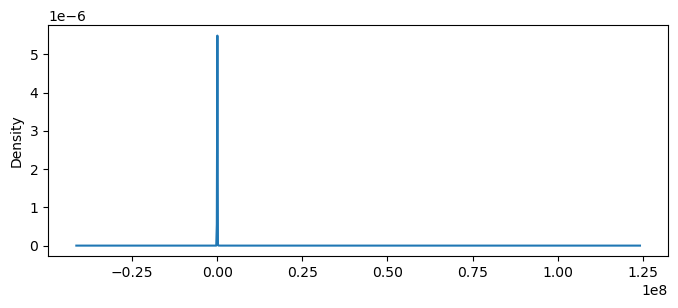

In [242]:
# gráfico KDE (Kernel Density Function)
df_copy_clean1['duration (seconds)'].plot.kde(subplots = True, figsize = (8,3))

In [243]:
# Removendo elementos acima do 3º quartil para melhorar análise dos dados
df_remove = df_copy_clean1['duration (seconds)'].loc[(df_copy_clean1['duration (seconds)'] > 600)]

In [244]:
# criando novo df sem os dados acima do 3º quartil
df_copy_clean2 = df_copy_clean1.drop(df_remove.index)

In [245]:
# novas dimensões do df
df_copy_clean2.shape

(51513, 9)

array([<Axes: ylabel='Density'>], dtype=object)

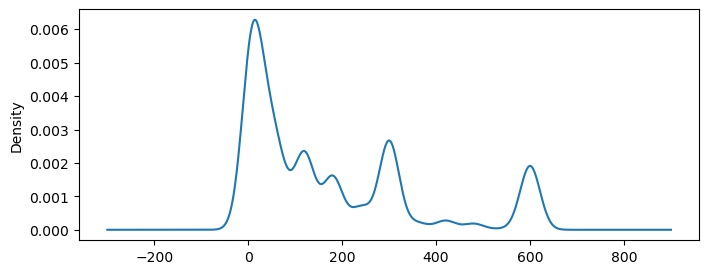

In [246]:
# gráfico KDE (Kernel Density Function)
df_copy_clean2['duration (seconds)'].plot.kde(subplots = True, figsize = (8,3))

In [247]:
# contando duração das aparições
df_copy_clean2['duration (seconds)'].value_counts()

duration (seconds)
300.00    7254
120.00    5973
600.00    5223
60.00     4830
180.00    4261
          ... 
300.13       1
345.50       1
56.00        1
71.00        1
181.00       1
Name: count, Length: 202, dtype: int64

In [248]:
# estatísticas da duração das aparições (melhoradas)
df_copy_clean2['duration (seconds)'].describe()

count    51513.000000
mean       168.461289
std        185.567019
min          0.010000
25%         15.000000
50%        120.000000
75%        300.000000
max        600.000000
Name: duration (seconds), dtype: float64

In [249]:
# conferindo se há dados duplicados
df_copy_clean2[df_copy_clean2.duplicated()]

datetime year_sight  duration (seconds) country state  \
310    10/11/1999 20:15       1999                30.0      us    ny   
312    10/11/1999 20:15       1999                60.0      us    ny   
761     10/1/2005 01:00       2005               600.0      us    il   
971     10/1/2013 12:30       2013                60.0      us    pa   
1135   10/12/2010 10:00       2010               300.0      us    ca   
...                 ...        ...                 ...     ...   ...   
76577    9/2/1999 21:00       1999               180.0      us    ak   
77437   9/24/2009 20:15       2009                 2.0      us    ga   
77938   9/26/2013 21:30       2013               180.0      us    sc   
78757   9/30/2007 22:00       2007                90.0      us    ga   
78948    9/3/2008 21:20       2008               600.0      us    tn   

                     city   latitude  longitude      shape  
310             portville  42.038611  -78.341111      oval  
312             portville  42.038611  -78.341111      oval  
761           tinley park  41.573333  -87.784444    circle  
971            pittsburgh  40.440556  -79.996111   unknown  
1135             milpitas  37.428333 -121.905556     other  
...                   ...        ...         ...       ...  
76577              seward  60.104167 -149.442222     light  
77437            hamilton  32.757778  -84.875000  fireball  
77938  north myrtle beach  33.815833  -78.680278    circle  
78757              portal  32.538056  -81.932500  triangle  
78948         blountville  36.533056  -82.326944     other  

[264 rows x 9 columns]

In [250]:
# removendo dados duplicados do df
df_copy_clean2 = df_copy_clean2.drop_duplicates()

In [251]:
# exibindo novos dados estatísticos
df_copy_clean2.describe()

duration (seconds)      latitude    longitude 
count        51249.000000  51249.000000  51249.000000
mean           168.285477     38.747070    -95.177920
std            185.475368      5.834198     18.535220
min              0.010000    -34.928661   -176.658056
25%             15.000000     34.256944   -114.321667
50%            120.000000     39.326944    -89.401111
75%            300.000000     42.381111    -80.280000
max            600.000000     72.700000    153.099533

In [252]:
# informações do df limpo
df_copy_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51249 entries, 3 to 80330
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            51249 non-null  object 
 1   year_sight          51249 non-null  object 
 2   duration (seconds)  51249 non-null  float64
 3   country             51249 non-null  object 
 4   state               51249 non-null  object 
 5   city                51249 non-null  object 
 6   latitude            51249 non-null  float64
 7   longitude           51249 non-null  float64
 8   shape               51249 non-null  object 
dtypes: float64(3), object(6)
memory usage: 3.9+ MB


In [253]:
# corrigindo dados não numéricos para estatísticas
to_type(df_copy_clean2, ['year_sight'], 'float')

In [254]:
df_copy_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51249 entries, 3 to 80330
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            51249 non-null  object 
 1   year_sight          51249 non-null  float64
 2   duration (seconds)  51249 non-null  float64
 3   country             51249 non-null  object 
 4   state               51249 non-null  object 
 5   city                51249 non-null  object 
 6   latitude            51249 non-null  float64
 7   longitude           51249 non-null  float64
 8   shape               51249 non-null  object 
dtypes: float64(4), object(5)
memory usage: 3.9+ MB


In [255]:
# estatísticas dos anos de aparição
df_copy_clean2['year_sight'].describe()

count    51249.000000
mean      2004.461960
std         10.025378
min       1910.000000
25%       2002.000000
50%       2007.000000
75%       2011.000000
max       2014.000000
Name: year_sight, dtype: float64

In [256]:
# estatísticas df (matriz transposta)
df_copy_clean2.describe().T

count         mean         std          min  \
year_sight          51249.0  2004.461960   10.025378  1910.000000   
duration (seconds)  51249.0   168.285477  185.475368     0.010000   
latitude            51249.0    38.747070    5.834198   -34.928661   
longitude           51249.0   -95.177920   18.535220  -176.658056   

                            25%          50%          75%          max  
year_sight          2002.000000  2007.000000  2011.000000  2014.000000  
duration (seconds)    15.000000   120.000000   300.000000   600.000000  
latitude              34.256944    39.326944    42.381111    72.700000  
longitude           -114.321667   -89.401111   -80.280000   153.099533

In [257]:
# criação de uma lista contendo todas as coordenadas (latitude, longitude) do df
coordenadas = []

for lat, lon in zip(df_copy_clean2['latitude'].values, df_copy_clean2['longitude '].values):
    coordenadas.append([lat, lon])

In [258]:
# imprimindo lista de coordenadas
coordenadas

[[28.9783333, -96.6458333],
 [36.595, -82.1888889],
 [33.5861111, -86.2861111],
 [30.2947222, -82.9841667],
 [33.9163889, -118.3516667],
 [35.2333333, -82.7344444],
 [37.1536111, -83.7619444],
 [35.8238889, -80.2536111],
 [42.5377778, -83.2330556],
 [32.8544444, -79.975],
 [45.5827778, -122.3522222],
 [29.4238889, -98.4933333],
 [38.2541667, -85.7594444],
 [40.7008333, -73.7133333],
 [32.7152778, -117.1563889],
 [29.7630556, -95.3630556],
 [32.7833333, -96.8],
 [42.9955556, -71.4552778],
 [29.7630556, -95.3630556],
 [44.7630556, -85.6205556],
 [41.0338889, -73.7633333],
 [43.0388889, -87.9063889],
 [43.9627778, -70.2830556],
 [40.015, -105.27],
 [47.6063889, -122.3308333],
 [34.1577778, -118.6375],
 [46.7163889, -122.9530556],
 [31.7058333, -83.6533333],
 [40.2736111, -76.8847222],
 [29.6158333, -95.5575],
 [35.8905556, -83.7247222],
 [32.7591667, -97.7969444],
 [40.6936111, -89.5888889],
 [36.2522222, -85.9516667],
 [42.9097222, -73.8955556],
 [34.1027778, -91.9922222],
 [39.0725, -93

In [259]:
# plotando mapa com folium

# folium.Map() --> chamada da biblioteca folium e do atributo Map
# location=[37.091211, -95.702891] --> mapa centrado nos EUA
# zoom_start --> ajuste inicial no tamanho do mapa
# tile --> 'camada' de visualização do mapa
mapa = folium.Map(location=[37.091211, -95.702891], zoom_start=3, tile='Stamen Terrain')

In [260]:
mapa

In [261]:
# HeatMap --> gerando mapa de calor
mapa.add_child(plugins.HeatMap(coordenadas))

In [262]:
# mostrando algumas coordenadas de avistamento
i = 0

while i < 100:
    folium.Marker(location=coordenadas[i], popup=folium.Popup("UFO", parse_html=True, max_width=100)).add_to(mapa)
    i += 1

In [263]:
mapa

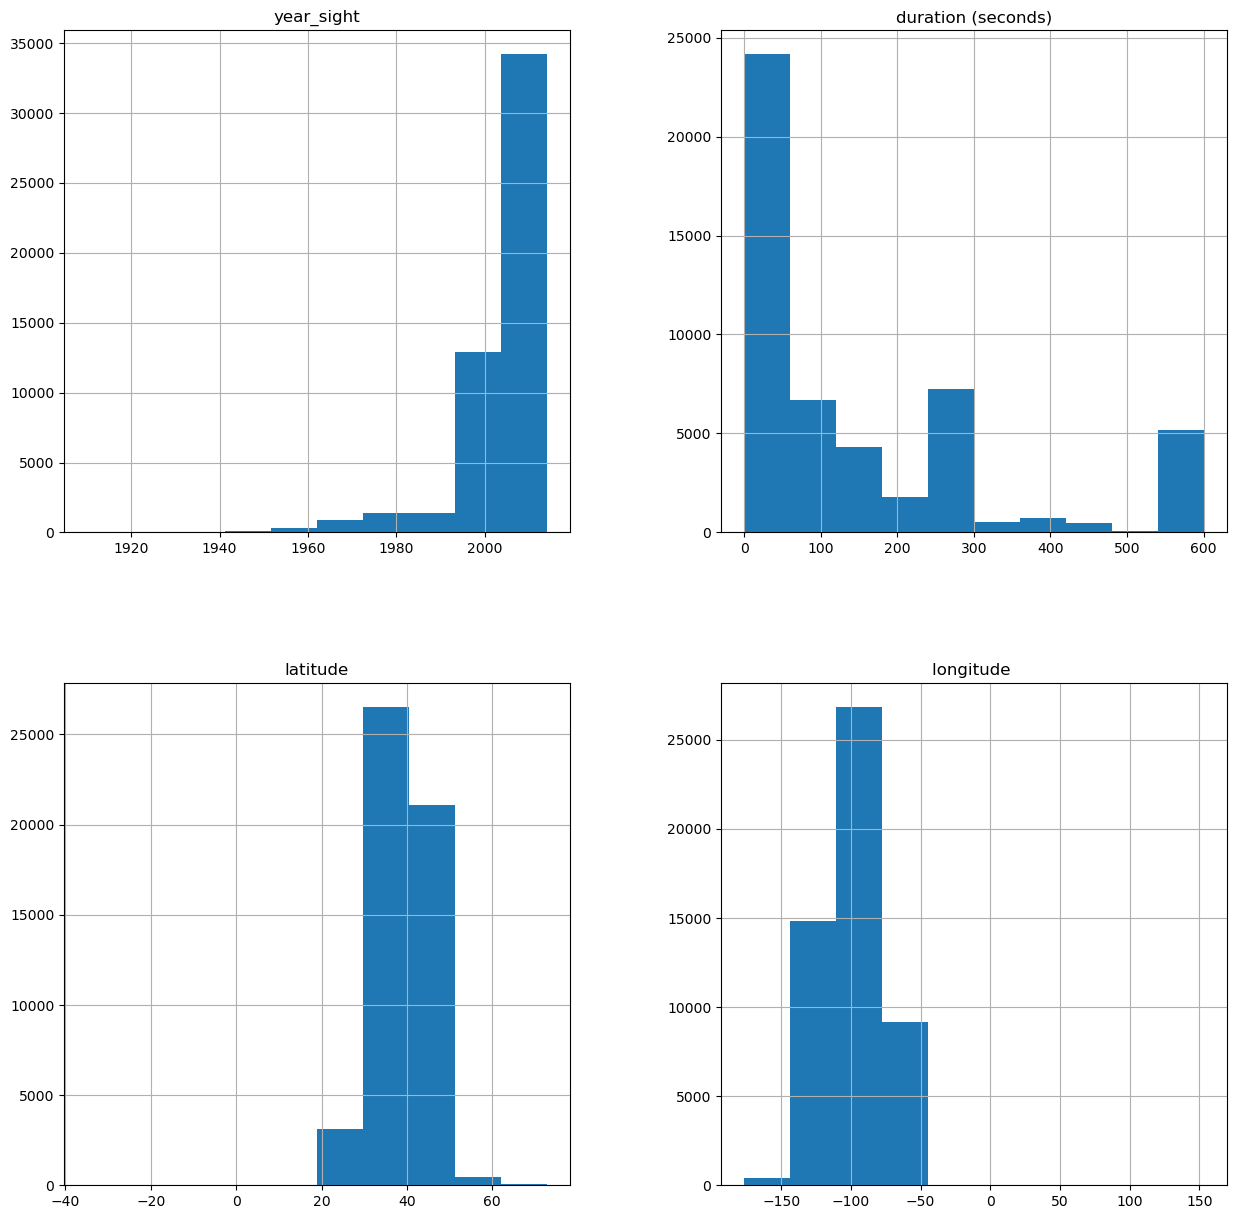

In [264]:
# plotando histogramas
df_copy_clean2.hist(figsize=(15,15))
plt.show()

In [265]:
# contagem dos formatos visuslizados
df_copy_clean2['shape'].value_counts()

shape
light        10460
triangle      5503
circle        4875
fireball      4680
other         3600
sphere        3551
unknown       3527
disk          3202
oval          2414
formation     1649
cigar         1397
changing       987
rectangle      924
flash          900
cylinder       855
chevron        723
diamond        689
teardrop       503
egg            480
cone           179
cross          142
delta            5
pyramid          1
round            1
flare            1
hexagon          1
Name: count, dtype: int64

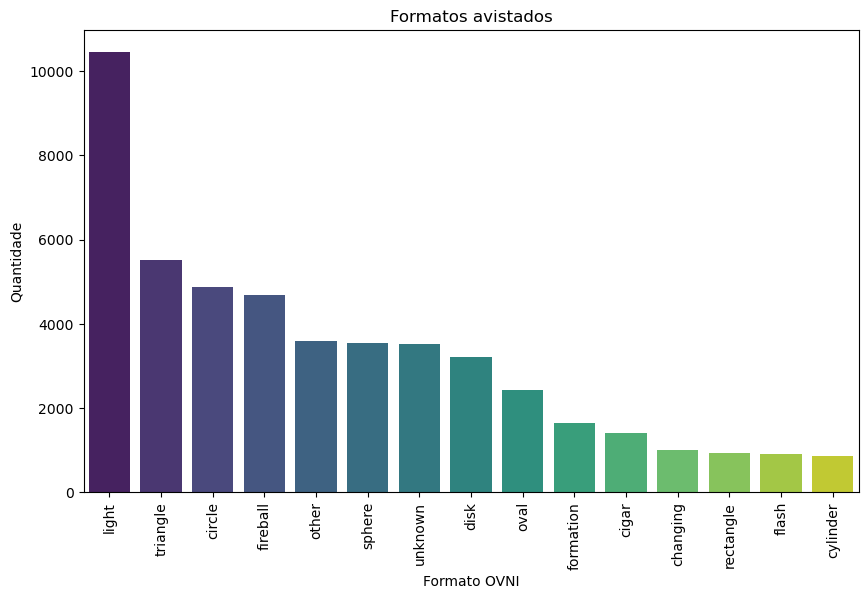

In [266]:
# gráfico de barras - formatos dos OVNI's
plt.figure(figsize=(10,6))
shape_sight = df_copy_clean2['shape'].value_counts().head(15)
sb.barplot(x=shape_sight.index, y=shape_sight.values, palette='viridis')
plt.xlabel('Formato OVNI')
plt.xticks(rotation = 90)
plt.ylabel('Quantidade')
plt.title('Formatos avistados')
plt.show()

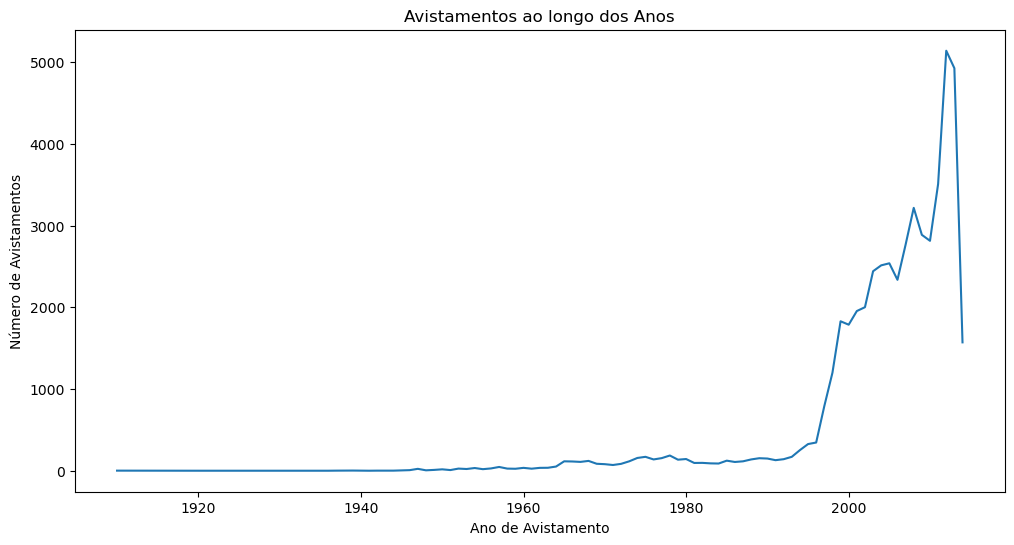

In [267]:
# Criando gráfico de linhas dos avistamentos ao longo dos anos
plt.figure(figsize=(12, 6))
sight_year = df_copy_clean2['year_sight'].value_counts().sort_index()
sb.lineplot(x=sight_year.index, y=sight_year.values)
plt.xlabel('Ano de Avistamento')
plt.ylabel('Número de Avistamentos')
plt.title('Avistamentos ao longo dos Anos')
plt.show()

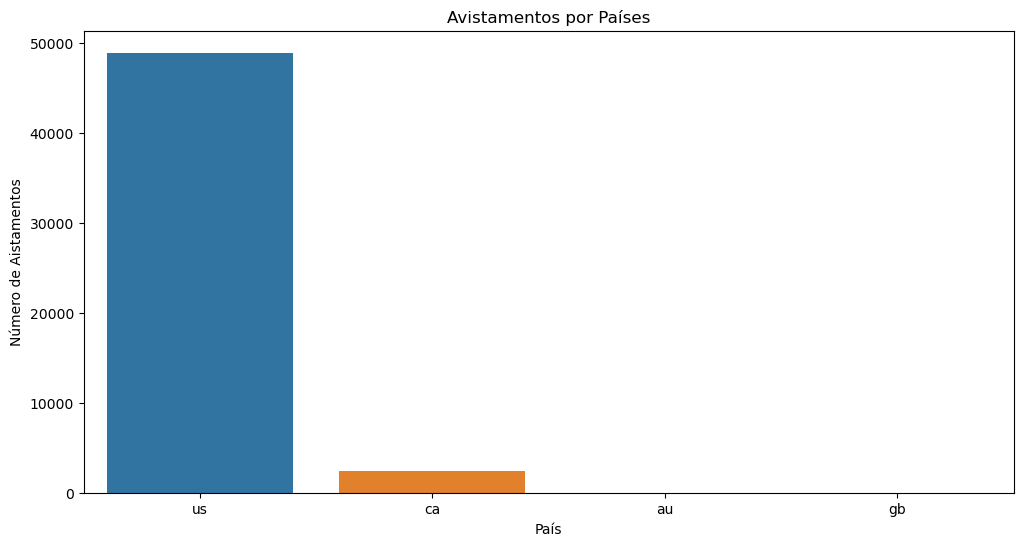

In [268]:
# Gráfico de Barras dos avistamentos por países
plt.figure(figsize=(12, 6))
country_sight = df_copy_clean2['country'].value_counts()
sb.barplot(x=country_sight.index, y=country_sight.values)
plt.xlabel('País')
plt.ylabel('Número de Aistamentos')
plt.title('Avistamentos por Países')
plt.show()

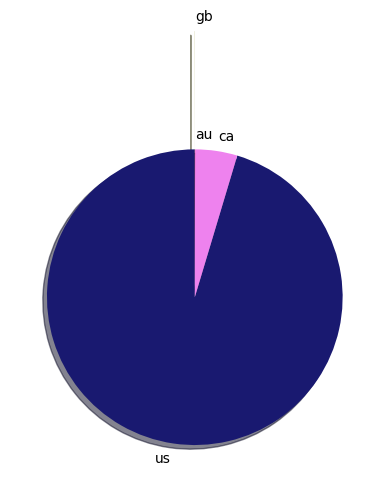

In [314]:
# # Gráfico de pizza dos avistamentos por países
fatias = df_copy_clean2['country'].value_counts()
paises = country_sight.index
cores = ['midnightblue', 'violet', 'red', 'olive' ]
plt.pie(fatias, labels=paises, colors=cores, startangle=90, shadow=True, explode=(0,0,0,0.8))
plt.show()

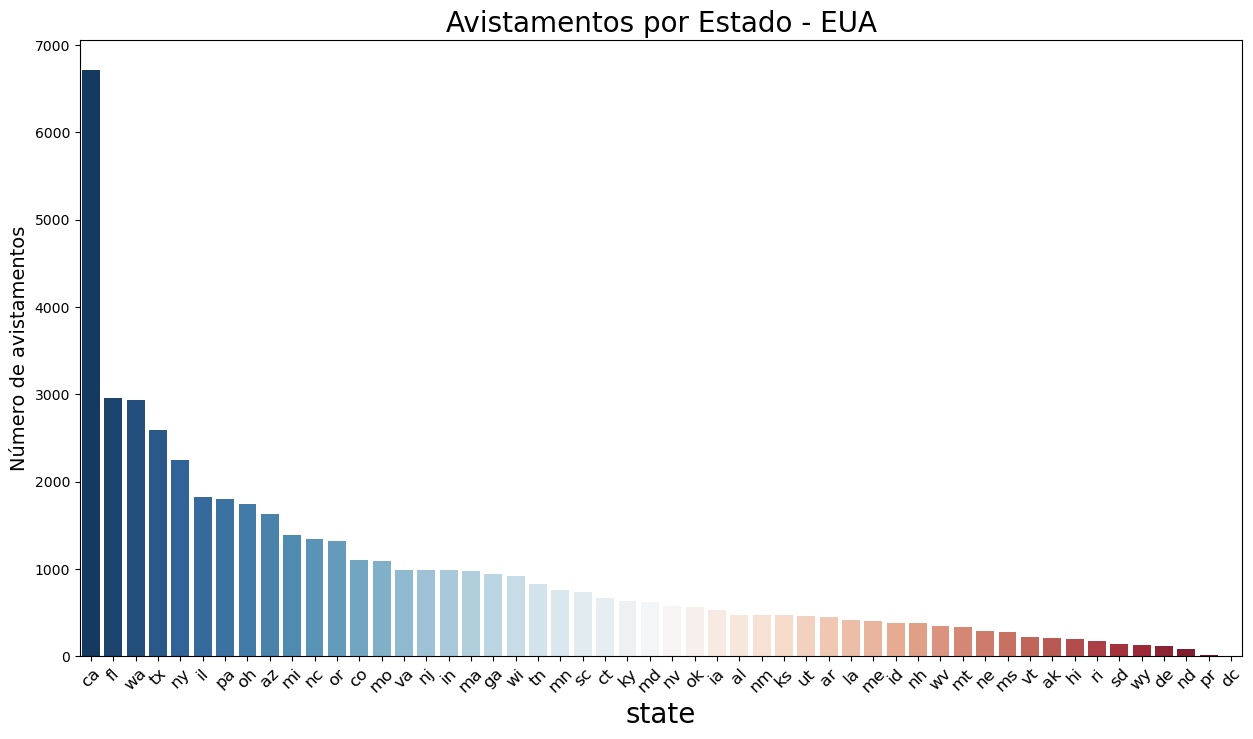

In [270]:
# gráfico de barras avistamentos por estado dos EUA
stats_sight = (df_copy_clean2['country']=='us')
df_state = df_copy_clean2[stats_sight]

state_stats = df_state.state.value_counts()
state_index = state_stats.index 
state_values = state_stats.values
plt.figure(figsize=(15,8))
plt.title('Avistamentos por Estado - EUA', fontsize=20)
plt.xlabel("Estado", fontsize=20)
plt.ylabel("Número de avistamentos", fontsize=14)
plt.xticks(rotation = 45, size=12)
state_plot = sb.barplot(x=state_index[:60],y=state_values[:60], palette='RdBu_r')

In [292]:
mes_count.values

array([7972, 7152, 6607, 6360, 6321, 5702, 4652, 4596, 4509, 4482, 4346,
       3817], dtype=int64)

In [313]:
# avistamentos por meses do ano
mes_count = (mes.value_counts())
mes_x = mes_count.index
mes_y = mes_count.values

mes_fig = go.Figure(data=[go.Bar(x=mes_x, y=mes_y, marker=dict(color='midnightblue'))])
mes_fig.update_layout(
    title='Avistamentos por Meses do ano',
    xaxis=dict(title='Mês'),
    yaxis=dict(title='Avistamentos')
)
py.init_notebook_mode(connected=True)
py.iplot(mes_fig)

In [288]:
# tratando as descrições/comentários
coment = " ".join([comment for comment in df_copy_clean0["comments"]])
coment = re.sub('[^a-zA-Z0-9\s]', '', coment) # removendo caracteres especiaiS
coment = re.sub(r'[^\w\s]', '', coment).lower() # Removendo pontuação e convertendo para minúsculas
irrelev = set(stopwords.words('english')) # removendo palavras irrelevantes
coment_limpos = [word for word in coment.split() if word not in irrelev]

In [273]:
coment

'this event took place in early fall around 194950 it occurred after a boy scout meeting in the baptist church the baptist church sit my older brother and twin sister were leaving the only edna theater at about 9 pm44we had our bikes and i took a different route home as a marine 1st lt flying an fj4b fighterattack aircraft on a solo night exercise44 i was at 504400039 in a quotcleanquot aircraft no ordinan my father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he39s still livi a bright orange color changing to reddish color disksaucer was observed hovering above power transmission lines strobe lighted disk shape object observed close44 at low speeds44 and low altitude in oct 1966 in pell city alabama saucer zaps energy from powerline as my pregnant mother receives mental signals not to pass info round 44 orange 44 with what i would say was polished metal of some kind around the edges  silent red orange mass of energy floa

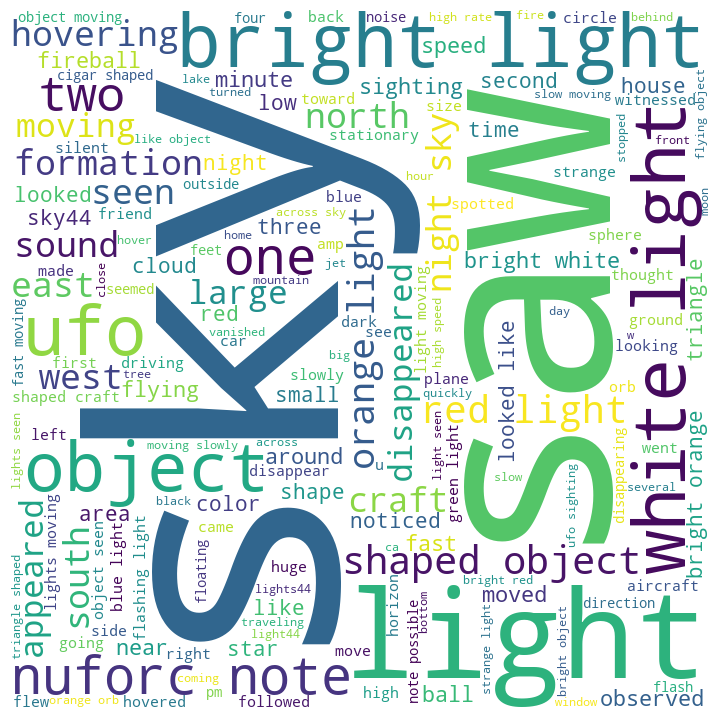

In [274]:
# gerando nuvem de palavras dos comentários
nuvem = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = irrelev,
                min_font_size = 10).generate(text)
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(nuvem)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

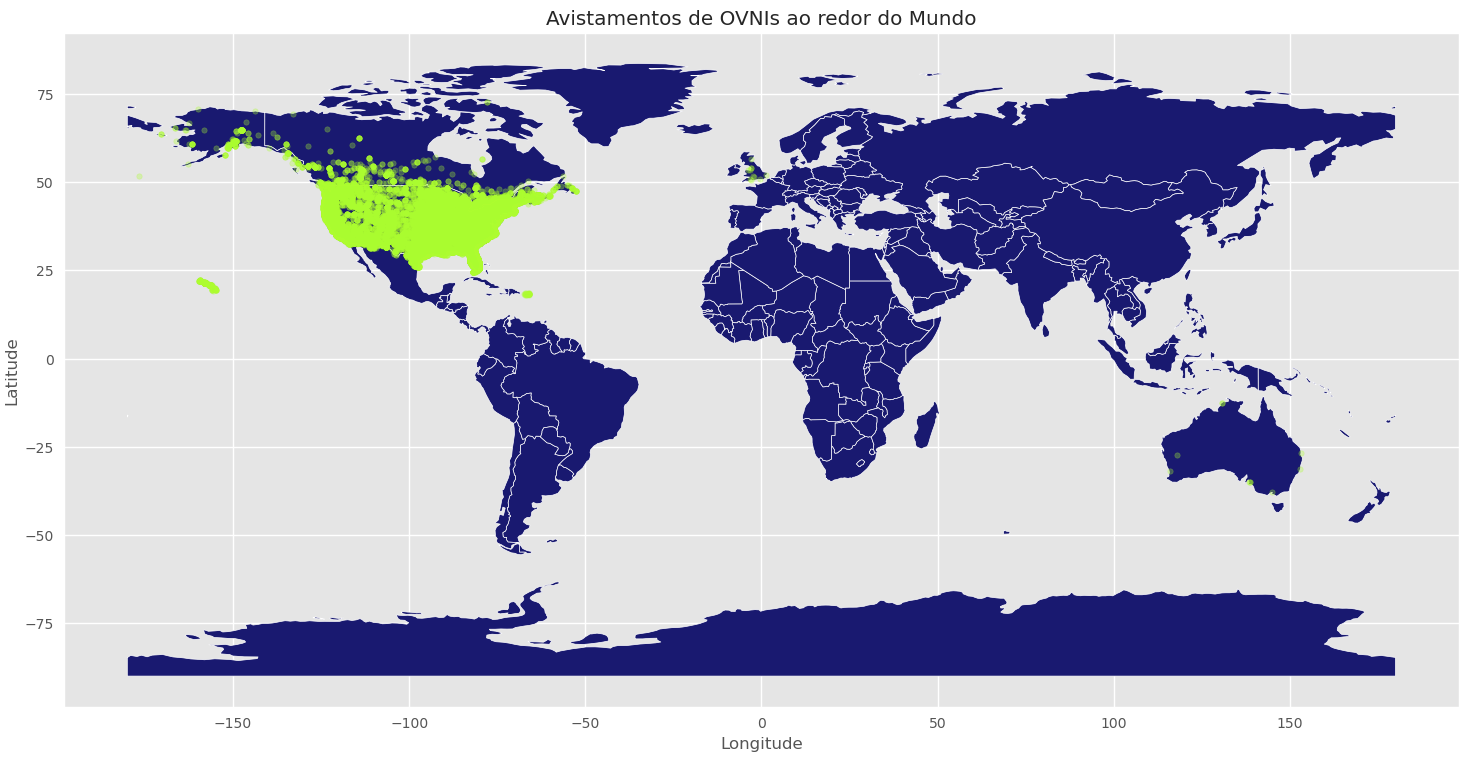

In [320]:
# avistamentos ao redor do mundo
with plt.style.context(("seaborn", "ggplot")):
    world.plot(figsize=(18,10),
               color="midnightblue",
               edgecolor = "white");

    plt.scatter(df_copy_clean0['longitude '], df_copy_clean0['latitude'], s=15, color="greenyellow", alpha=0.3)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Avistamentos de OVNIs ao redor do Mundo");